In [1]:
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import torch
import numpy as np
import torch.nn.functional as F
from torch import nn
import torchvision

In [2]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)

Files already downloaded and verified


In [3]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=10, 
                                           shuffle=True)

In [4]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # in, out, k, (s=1)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, stride=2) 
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 400-120-84-10
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) 

    def forward(self, x):
        z = nn.functional.relu(self.conv1(x))  
        z = self.pool(z)                         
        z = nn.functional.relu(self.conv2(z))  
        z = self.pool(z)                         
        z = z.reshape(-1, 16 * 5 * 5)            
        z = nn.functional.relu(self.fc1(z))
        z = nn.functional.relu(self.fc2(z))
        z = F.softmax(self.fc3(z), dim=1)    
        return z

    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.leaky_relu(x)
        x = self.fc5(x)
        x = F.softmax(x)
        return x


net = Net()
net.train()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
SGD = optim.SGD(net.parameters(), lr=0.01, momentum=0.0)
adagard = optim.Adagrad(net.parameters(), lr=0.1)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.015, momentum=0.0)

In [9]:
num_epochs = 6

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 5000 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/6]. Step [1/5000]. Loss: 0.230
Epoch [2/6]. Step [1/5000]. Loss: 0.230
Epoch [3/6]. Step [1/5000]. Loss: 0.230
Epoch [4/6]. Step [1/5000]. Loss: 0.221
Epoch [5/6]. Step [1/5000]. Loss: 0.233
Epoch [6/6]. Step [1/5000]. Loss: 0.212
Training is finished!


In [10]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:  cat ship ship plane frog frog car frog


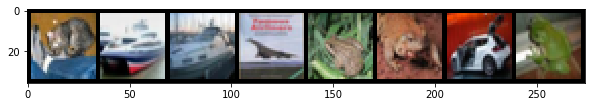

In [11]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [12]:
print(outputs)

tensor([[2.5719e-04, 6.6525e-02, 9.9830e-03, 8.9065e-01, 3.6217e-04, 1.5131e-02,
         1.1951e-02, 3.8678e-06, 4.4848e-03, 6.4924e-04],
        [3.3079e-06, 1.0004e-03, 2.1168e-08, 1.1942e-08, 1.1028e-11, 8.0554e-10,
         3.5057e-12, 3.2671e-13, 9.9898e-01, 1.7753e-05],
        [7.4496e-05, 2.5559e-01, 3.7299e-06, 7.3659e-05, 1.4462e-09, 3.2407e-06,
         7.7851e-09, 5.4274e-10, 7.3798e-01, 6.2674e-03],
        [7.2703e-01, 1.3339e-03, 1.7971e-04, 1.3211e-06, 4.7892e-07, 1.5931e-07,
         1.4790e-10, 1.1738e-09, 2.7145e-01, 4.8772e-07],
        [2.6298e-07, 4.2319e-07, 3.6786e-03, 8.0854e-04, 9.3743e-01, 3.4517e-04,
         5.7124e-02, 6.1659e-04, 3.6508e-07, 1.1941e-07],
        [1.5124e-10, 1.2191e-04, 9.9744e-07, 6.6709e-05, 1.5799e-04, 2.4436e-06,
         9.9964e-01, 2.1303e-07, 5.3718e-08, 8.8516e-06],
        [7.2035e-08, 2.1990e-01, 1.2345e-05, 6.9457e-01, 3.1367e-08, 5.2616e-02,
         9.1727e-04, 7.7925e-06, 3.1011e-05, 3.1938e-02],
        [1.5883e-09, 3.1992

In [13]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([3, 8, 8, 0, 4, 6, 3, 6])

In [14]:
print('Predicted: ', ' '.join(classes[predicted[j]] for j in range(len(labels))))

Predicted:  cat ship ship plane deer frog cat frog


In [15]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'ship' 'ship' 'plane' 'deer' 'frog' 'cat' 'frog']
Accuracy is 0.75


### Много разных параметров перепробовал, вручную подставлял, так удобнее и нагляднее. Из-за того, что очень много времени просидел, есть ощущение, что просто повезло, хоть я и пришел к таким слоям с помощью гугла, а learning rate и num_epochs долго и упорно подбирал.